For this project, The objective is to build a predictive model which is able to distinguish between our main product categories.
So for this project, I would off importing numpy( a library for working with arrays) and pandas( a library for data manipulation and analyis) to read train and test datasets then splitting the train dataset into two sepearate dataset.
After reading and separating the data into training and testing set then I can start the training process. To train the data I call out the scikit-learn library,which is used to split datasets into training and testing subsets.I split the 'train' dataset into two separate datasets: 'cb_train' and 'cb_test'. The 'test_size' parameter is set to 0.2, meaning that 20% of the original dataset will be assigned to 'cb_test', while the remaining 80% will be assigned to 'cb_train'. Then call out cb_train to see the dataset.

In [32]:

import numpy as np
import pandas as pd

train=  pd.read_csv('/content/drive/MyDrive/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')

from sklearn.model_selection import train_test_split
cb_train, cb_test = train_test_split(train, test_size = 0.2)
cb_train

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
23819,23820,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,Class_3
12147,12148,0,0,0,0,0,0,0,0,2,...,1,0,0,1,0,0,0,1,0,Class_2
1167,1168,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,2,0,0,0,Class_1
43925,43926,0,0,1,0,0,0,1,0,0,...,0,1,2,0,2,0,0,1,0,Class_6
42772,42773,0,0,9,8,0,0,0,0,0,...,0,0,0,0,2,0,0,0,1,Class_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47494,47495,0,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,1,0,Class_7
43837,43838,0,0,14,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_6
10112,10113,0,0,0,0,0,0,0,0,19,...,0,1,0,1,0,0,0,0,0,Class_2
37882,37883,0,0,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_6


The next step is to separate the features and labels from the cb_train and cb_test datasets.I use the drop() method on the 'cb_train' dataFrame to remove the 'id' and 'target' columns. By setting axis=1, you specify that you want to drop columns instead of rows. The resulting dataFrame, which contains only the feature columns, is assigned to the variable 'cb_feature'.Then extract the 'target' column from the 'cb_train' DataFrame and assign it to the 'cb_label' variable.I also extended the same layout to test feature and label.

In [33]:
cb_feature=cb_train.drop(['id','target'], axis=1)
cb_label=cb_train['target']

cb_feature_test=cb_test.drop(['id','target'], axis=1)
cb_label_test=cb_test['target']


Next, I  import the LabelEncoder class from the scikit-learn library. This class can be used to encode target labels with values between 0 and the number of classes minus 1.I  create an instance of the LabelEncoder then  use the fit_transform() method to encode the target values in the 'cb_label' Series. This method first fits the encoder to the data and then transforms the data 

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
le=LabelEncoder()
cb_label= le.fit_transform(cb_label)
cb_label_test= le.fit_transform(cb_label_test)

Next,I importing the XGBClassifier class from the XGBoost library, defining the model parameters, creating an XGBClassifier instance with those parameters, and fitting the model to the training data.The parameters I use to define the training model I use:

*   n_estimators: Boosting trees to be built.
*   tree_method: The tree construction algorithm used in XGBoost
*   predictor: The predictor algorithm used. 
*   enable_categorical:Enable support for categorical data
*   max_depth: Maximum tree depth for base learners
*   learning_rate: Boosting learning rate 

Then i fit the model to the training data to train the XGBClassifier on the feature data 'cb_feature' and target labels 'cb_label'. The model learns to make predictions based on the input features and their corresponding target values.

In [35]:
from xgboost import XGBClassifier
params = { "n_estimators":210,'tree_method':'gpu_hist', 'predictor':'gpu_predictor','enable_categorical':True, 'max_depth':'10','learning_rate':.5  }
model = XGBClassifier(**params)
model.fit(cb_feature,cb_label)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth='10', max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=210, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor='gpu_predictor', ...)

Then, I import the accuracy_score function from the scikit-learn library, making predictions on the test dataset using the trained XGBClassifier model, and calculating the accuracy of the model.

In [36]:
from sklearn.metrics import accuracy_score
predictions = model.predict(cb_feature_test)
accuracy_score(cb_label_test, predictions)


0.8242566257272139

Next, I preprocessing the 'test' dataset and making predictions using the trained XGBClassifier model and alsoone-hot encoding the predictions. I drop the 'id' column from the test dataset. I use the predict() method of the 'model' object (the trained XGBClassifier) to make predictions on the feature data 'test_features' from the test dataset.Then I One-hot encoding the prediction to  represent categorical data as binary vectors.

In [37]:
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
test_features = test.drop('id', axis=1)

# Make predictions for submission
prediction_sub = model.predict(test_features)

# One-hot encode the predictions
X = np.array(prediction_sub).reshape(-1, 1)
onehot_encoder = OneHotEncoder(sparse=False)
submission_file = onehot_encoder.fit_transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Then I created a dataframe that set the column names to represent the predicted class probabilities and use the 'id' column from the original 'test'.

In [38]:

# Create a DataFrame for submission
submission_file_df = pd.DataFrame(submission_file,
                                  columns=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
                                           'Class_7', 'Class_8', 'Class_9'], index=test['id'])

# Save the submission file as a CSV
submission_file_df

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
144364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
144366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This image of my score from the OTTO group product classification challenge.



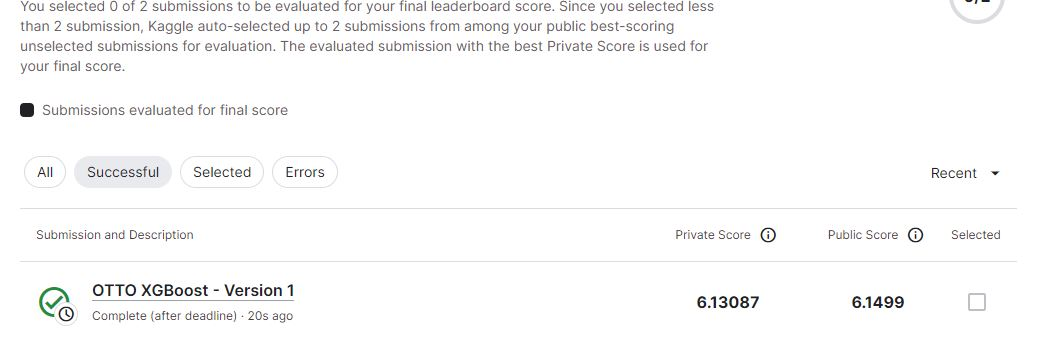